In [1]:
# estimate CNR of the auditory claustrum based on the CNR of the cortical regions and the visual clausrum
visual_cortex = (0.54186845 + 0.65284463)/2
visual_claustrum = 0.07299358
auditory_cortex = 0.37967292
auditory_claustrum = auditory_cortex*visual_claustrum/visual_cortex
print(auditory_claustrum)

0.04639387669523733


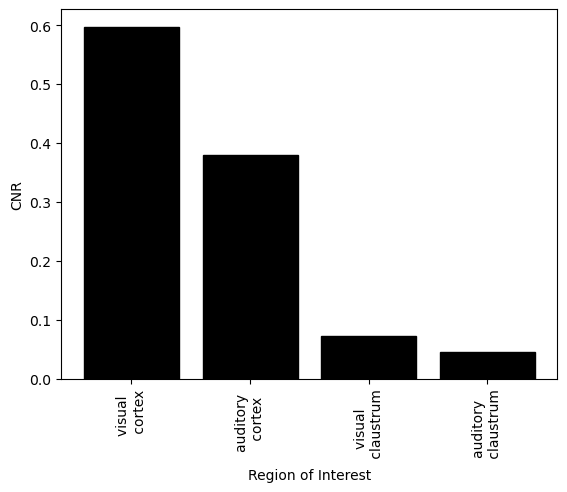

In [2]:
# plot CNR values
import matplotlib.pyplot as plt
roi = ['visual \n cortex', 'auditory \n cortex', 'visual \n claustrum', 'auditory \n claustrum']
plt.bar(roi, [visual_cortex, auditory_cortex, visual_claustrum, auditory_claustrum], color='black', edgecolor='black', capsize=5)
plt.xlabel('Region of Interest')
plt.xticks(rotation=90)
plt.ylabel('CNR')
plt.show()

In [3]:
# fixed effects power analysis (n samples/n volumes need to detect significan voxels)
from statsmodels.stats.power import ttest_power, tt_ind_solve_power
ratio=1 # ratio is 1, if we want to compare auditory vs. baseline and visual vs. baseline
n_samples_A = tt_ind_solve_power(effect_size=auditory_claustrum, alpha=0.05, power=0.8, ratio=ratio, alternative='two-sided')
n_samples_V = tt_ind_solve_power(effect_size=visual_claustrum, alpha=0.05, power=0.8, ratio=ratio, alternative='two-sided')
print(n_samples_A)
print(n_samples_V)

7294.112718977036
2947.19494864258


/Users/natalia/anaconda3/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/Users/natalia/anaconda3/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


In [4]:
# determine scanning hours 
# note: we multiply n_samples_A by 3, because we also need visual and baseline samples of the same size in one experiment
TR = 2 # assumed TR in seconds
scanning_time_hours_A = (n_samples_A*3)*TR/60/60
scanning_time_hours_V = (n_samples_V*3)*TR/60/60
print(scanning_time_hours_A)
print(scanning_time_hours_V)

12.156854531628394
4.911991581070967
